In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import seaborn as sns
import scipy.stats as stats

**Q1(a)**

In [9]:
def transition_matrix(p):
    q = 1 - p
    return np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])

In [10]:
ps = np.arange(0,1.1,0.1)
R = 1

for p in ps:
    print(p)
    P = transition_matrix(p)
    evals, evecs = np.linalg.eig(P)
    print(evals)
    dmax = np.max(np.abs(evals))
    print(dmax)
    print('\n')

0.0
[-0.80901699+0.58778525j -0.80901699-0.58778525j  0.30901699+0.95105652j
  0.30901699-0.95105652j  1.        +0.j        ]
1.0000000000000004


0.1
[-0.80901699+0.4702282j  -0.80901699-0.4702282j   1.        +0.j
  0.30901699+0.76084521j  0.30901699-0.76084521j]
1.0000000000000004


0.2
[-0.80901699+0.35267115j -0.80901699-0.35267115j  1.        +0.j
  0.30901699+0.57063391j  0.30901699-0.57063391j]
1.0


0.30000000000000004
[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.        +0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]
0.9999999999999998


0.4
[-0.80901699+0.11755705j -0.80901699-0.11755705j  1.        +0.j
  0.30901699+0.1902113j   0.30901699-0.1902113j ]
0.999999999999999


0.5
[-0.80901699  0.30901699  1.         -0.80901699  0.30901699]
0.9999999999999997


0.6000000000000001
[-0.80901699+0.11755705j -0.80901699-0.11755705j  1.        +0.j
  0.30901699+0.1902113j   0.30901699-0.1902113j ]
1.0000000000000002


0.7000000000000001
[-0.80901699+0.2351141j  -0.809

**Q1(b)**

In [22]:
epsilons = np.arange(0.1,0.2,0.1)
p = 0.7
P = transition_matrix(p)

for eps in epsilons:
    print(eps)
    P_eps = (1 - eps)*P
    for i in range(5):
        P_eps[i,i] = eps

    evals, evecs = np.linalg.eig(P)
    evals_eps, evecs_eps = np.linalg.eig(P_eps)
    print(evecs)
    print('\n')
    print(evecs_eps)
    print('\n')
    
    print('Same eigenvectors?                                          ', np.allclose(evecs_eps,evecs))
    print('$\lambda_i^\epsilon = \lambda_i (1 - \epsilon) + \epsilon$? ', np.allclose(evals_eps, evals*(1 - eps) 
                                                                                      + eps))
    print('\n')

0.1
[[-0.3618034-0.26286556j -0.3618034+0.26286556j -0.4472136+0.j
   0.4472136+0.j          0.4472136-0.j        ]
 [ 0.4472136+0.j          0.4472136-0.j         -0.4472136+0.j
   0.1381966+0.4253254j   0.1381966-0.4253254j ]
 [-0.3618034+0.26286556j -0.3618034-0.26286556j -0.4472136+0.j
  -0.3618034+0.26286556j -0.3618034-0.26286556j]
 [ 0.1381966-0.4253254j   0.1381966+0.4253254j  -0.4472136+0.j
  -0.3618034-0.26286556j -0.3618034+0.26286556j]
 [ 0.1381966+0.4253254j   0.1381966-0.4253254j  -0.4472136+0.j
   0.1381966-0.4253254j   0.1381966+0.4253254j ]]


[[ 0.4472136+0.j          0.4472136-0.j         -0.4472136+0.j
   0.3618034-0.26286556j  0.3618034+0.26286556j]
 [-0.3618034+0.26286556j -0.3618034-0.26286556j -0.4472136+0.j
   0.3618034+0.26286556j  0.3618034-0.26286556j]
 [ 0.1381966-0.4253254j   0.1381966+0.4253254j  -0.4472136+0.j
  -0.1381966+0.4253254j  -0.1381966-0.4253254j ]
 [ 0.1381966+0.4253254j   0.1381966-0.4253254j  -0.4472136+0.j
  -0.4472136+0.j         -0.447213

In [25]:
evals

array([-0.80901699+0.2351141j , -0.80901699-0.2351141j ,
        1.        +0.j        ,  0.30901699+0.38042261j,
        0.30901699-0.38042261j])

**Q1(c)**

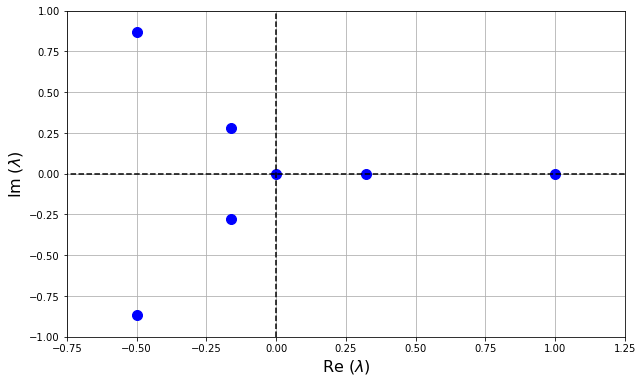

In [46]:
P = np.array([[0,0,1/2,1/4,1/4,0,0],[0,0,1/3,0,2/3,0,0],[0,0,0,0,0,1/3,2/3],[0,0,0,0,0,1/2,1/2],
              [0,0,0,0,0,3/4,1/4],[1/2,1/2,0,0,0,0,0],[3/4,1/4,0,0,0,0,0]])

evals, evecs = np.linalg.eig(P)

x = [ele.real for ele in evals] # extract real part
y = [ele.imag for ele in evals] # extract imaginary part
  
# plot the complex numbers
plt.figure(figsize = (10,6))
plt.plot(x, y, 'bo', markerfacecolor='b', markersize=10)
plt.ylabel('Im $(\lambda)$',fontsize=16)
plt.xlabel('Re $(\lambda)$',fontsize=16)
plt.hlines(0,-2,2,color='k',linestyle='dashed')
plt.vlines(0,-1,1,color='k',linestyle='dashed')
plt.xlim(-0.75,1.25)
plt.ylim(-1,1)
plt.grid()
plt.show()

In [60]:
for j in range(7):
    print(np.abs(evals[j]))

1.0000000000000009
1.0000000000000009
1.0000000000000007
0.3207084276064004
0.3207084276064004
0.32070842760640067
1.4557912378438565e-18


There are three eigenvalues with $|\lambda_i| = 1$, so excluding our $\lambda = 1$ we are left with two eigenvalues $\lambda_j \in \mathcal{C} \setminus \{1\}$ satisfying $|\lambda_j| = 1$.

Hence, the transition matrix $P$ is periodic.

In [49]:
#This is a python function for simulating the RW. It takes inputs:
# P: transistion matrix (3 by 3)
# tmax: number of time steps
# N: no. of independent random walks to simulate
# IC: initial starting position for each of the chains (array of length N)

def SRW(P, tmax, N, IC):
    Y = np.zeros((N,tmax))          #array to store the state of the MC at each time for each realisation
    Y[:,0] = IC                     #initialise all realisations
    
    #simulate the chain for each time step in a loop
    for j in range(0,tmax-1):
        #these indexes finds out where the current state is (for each realisation)
        state1 = (Y[:,j] == 1)
        state2 = (Y[:,j] == 2)
        state3 = (Y[:,j] == 3)
        state4 = (Y[:,j] == 4)
        state5 = (Y[:,j] == 5)
        state6 = (Y[:,j] == 6)
        state7 = (Y[:,j] == 7)
        
        # next we randomly sample from choices [1,2,3,4,5,6,7] with probability for each given by the row of 
        # the current state j (we do this N times, where N is the number of states currently in state j)
        # i.e. at t = 0, suppose all realisations are in state 1, therefore we sample N times 
        # with probabilities given by the first row of P. 
        r1 = np.random.choice([1,2,3,4,5,6,7],sum(state1),replace=True,p = P[0,:])
        r2 = np.random.choice([1,2,3,4,5,6,7],sum(state2),replace=True,p = P[1,:])
        r3 = np.random.choice([1,2,3,4,5,6,7],sum(state3),replace=True,p = P[2,:])
        r4 = np.random.choice([1,2,3,4,5,6,7],sum(state4),replace=True,p = P[3,:])
        r5 = np.random.choice([1,2,3,4,5,6,7],sum(state5),replace=True,p = P[4,:])
        r6 = np.random.choice([1,2,3,4,5,6,7],sum(state6),replace=True,p = P[5,:])
        r7 = np.random.choice([1,2,3,4,5,6,7],sum(state7),replace=True,p = P[6,:])
        
        #now we advance each of the states at time j, to the new states at time j+1
        Y[state1,j+1] = r1
        Y[state2,j+1] = r2
        Y[state3,j+1] = r3
        Y[state4,j+1] = r4
        Y[state5,j+1] = r5
        Y[state6,j+1] = r6
        Y[state7,j+1] = r7
        
    return Y

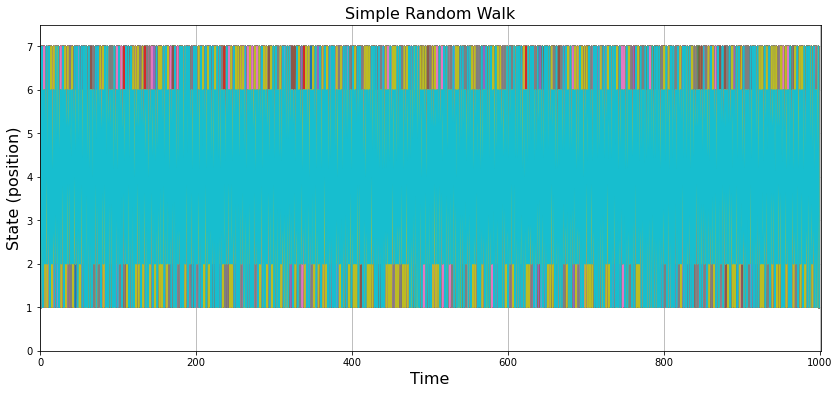

In [52]:
N = 100
tmax = 1000
IC = np.ones((N))

Y = SRW(P, tmax, N, IC)

#plot the output matrix Y for a sanity check
plt.figure(figsize = (14,6))
for k in range(N):
    plt.plot(range(tmax), Y[k,:])
     
plt.xlabel('Time',fontsize=16)
plt.ylabel('State (position)',fontsize=16)
plt.title('Simple Random Walk',fontsize=16)

plt.xlim([-1, tmax+1])
plt.ylim([0, 7.5])
plt.grid()

Plot the empirical distributions of the set of 100 MCs at different time slices and we should hopefully see the set of chains converging to our stationary distribution. 

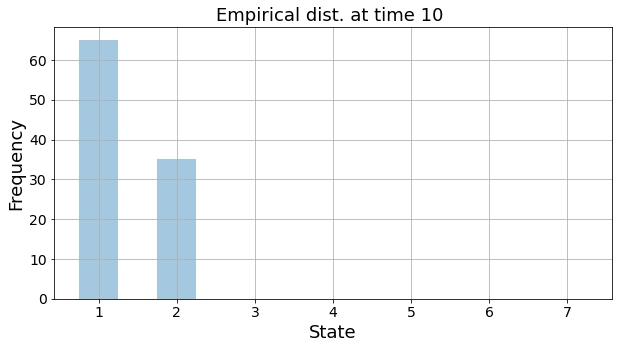

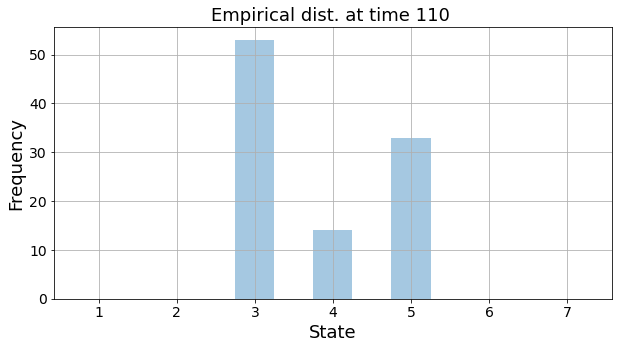

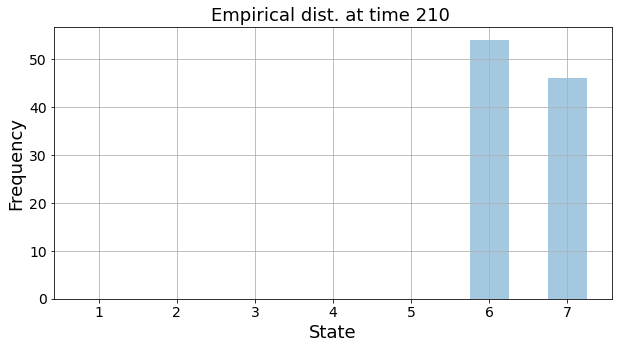

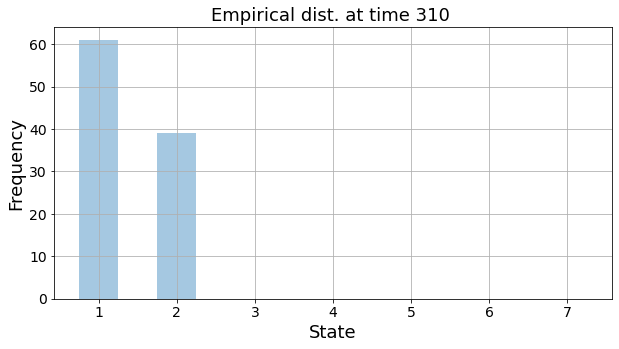

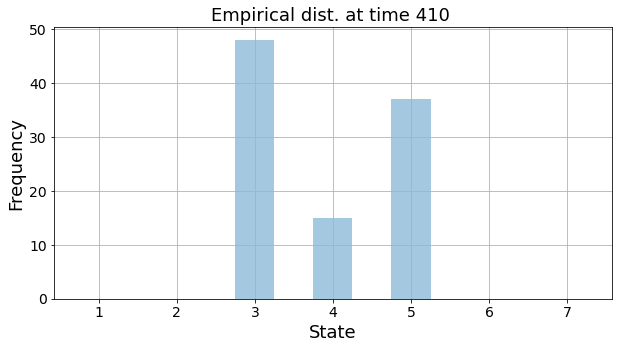

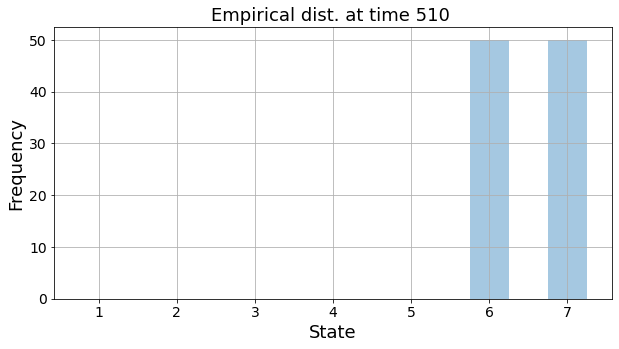

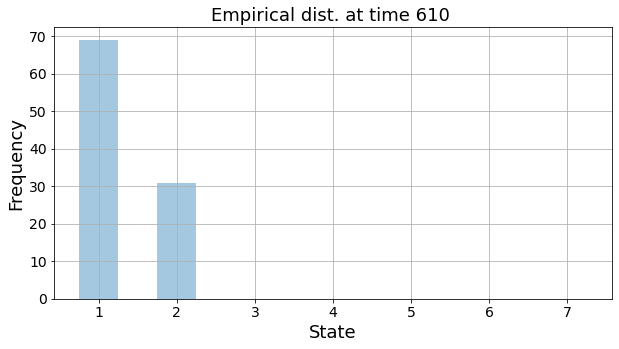

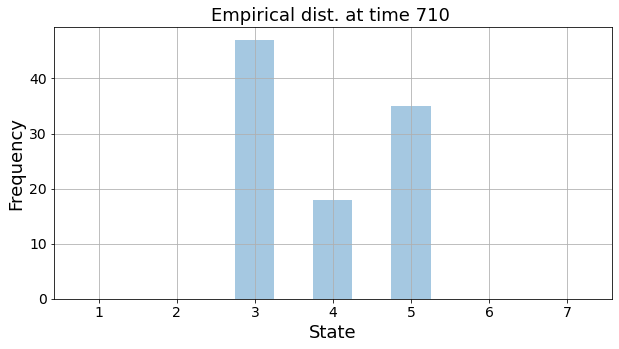

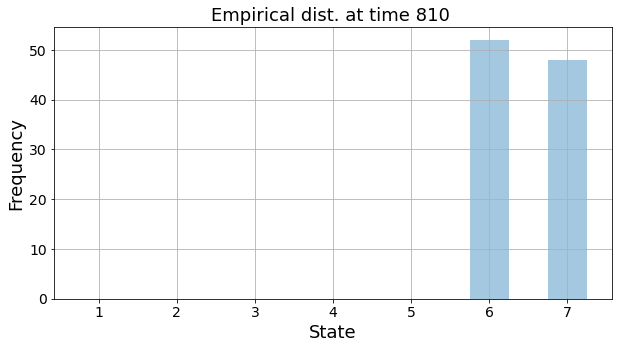

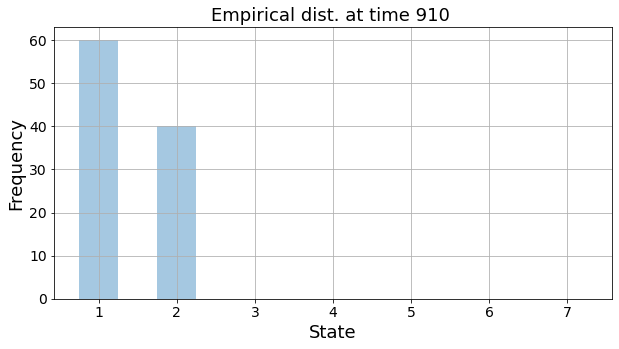

In [59]:
bins = [0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75,6.25,6.75,7.25]

times = np.arange(10,1000,100)

for t in times:
    plt.figure(figsize = (10,5))
    plt.title('Empirical dist. at time %d ' % t,fontsize=18)
    plt.grid()
    sns.distplot(Y[:,t-1],bins = bins,kde=False)
    plt.xticks([1,2,3,4,5,6,7],fontsize=14)
    plt.xlabel("State",fontsize=18)
    plt.ylabel("Frequency",fontsize=18)
    plt.yticks(fontsize=14)
    plt.show()

here are some changes that i made to the notebook